<a href="https://colab.research.google.com/github/akheel143/garbage_classification_model/blob/main/garbage_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
src=files.upload()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!mkdir models/
!cp '/content/drive/My Drive/garbage_classification_ai_challenge-dataset.zip''/'

mkdir: cannot create directory ‘models/’: File exists
cp: missing destination file operand after '/content/drive/My Drive/garbage_classification_ai_challenge-dataset.zip/'
Try 'cp --help' for more information.


In [10]:
!unzip garbage_classification_ai_challenge-dataset.zip

Archive:  garbage_classification_ai_challenge-dataset.zip
   creating: TEST/
  inflating: TEST/037.jpg            
  inflating: TEST/205.jpg            
  inflating: TEST/143.jpg            
  inflating: TEST/188.jpg            
  inflating: TEST/057.jpg            
  inflating: TEST/277.jpg            
  inflating: TEST/266.jpg            
  inflating: TEST/081.jpg            
  inflating: TEST/250.jpg            
  inflating: TEST/068.jpg            
  inflating: TEST/019.jpg            
  inflating: TEST/133.jpg            
  inflating: TEST/017.jpg            
  inflating: TEST/288.jpg            
  inflating: TEST/166.jpg            
  inflating: TEST/263.jpg            
  inflating: TEST/177.jpg            
  inflating: TEST/149.jpg            
  inflating: TEST/197.jpg            
  inflating: TEST/112.jpg            
  inflating: TEST/087.jpg            
  inflating: TEST/105.jpg            
  inflating: TEST/189.jpg            
  inflating: TEST/295.jpg            
  inflating

In [11]:
import tensorflow as tf

In [22]:
train_batches =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
    rotation_range=40,                                                           
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [23]:
val_batch=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [24]:
train_generator=train_batches.flow_from_directory('/content/TRAIN',
                                          target_size=(200,200),
                                          batch_size=30,
                                          class_mode='categorical',
                                          subset='training')

val_generator=train_batches.flow_from_directory('/content/TRAIN',
                                          target_size=(200,200),
                                          batch_size=30,
                                          class_mode='categorical',
                                          subset='validation')

test_generator=test.flow_from_directory('/content/TEST',
                                        target_size=(200,200),
                                        batch_size=30,
                                        class_mode='categorical')

Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [25]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [26]:
import os
print(os.listdir('/content/TRAIN'))

['plastic', 'metal', 'glass', 'cardboard', 'paper', 'trash']


In [27]:
data_path = '/content/TRAIN'

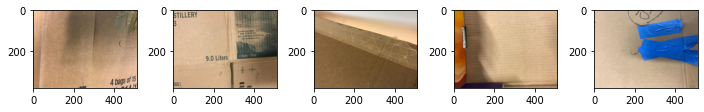

In [28]:
plot_imgs(data_path+'/cardboard')

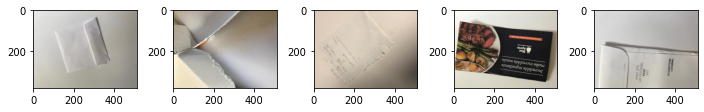

In [29]:
plot_imgs(data_path+'/paper')

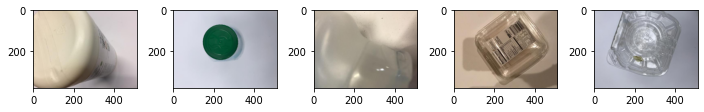

In [30]:
plot_imgs(data_path+'/plastic')

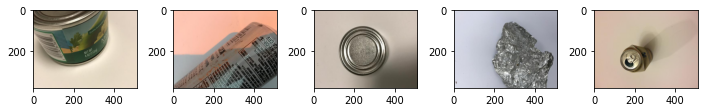

In [31]:
plot_imgs(data_path+'/metal')

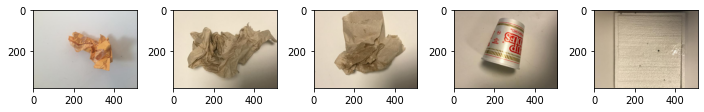

In [32]:
plot_imgs(data_path+'/trash')

In [36]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout

In [38]:
model =Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200,200,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)            

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(train_generator, epochs=5,validation_data=val_generator)

Epoch 1/5
54/54 [==============================] - 124s 2s/step - loss: 1.7097 - accuracy: 0.2339 - val_loss: 1.5912 - val_accuracy: 0.3015
Epoch 2/5
54/54 [==============================] - 122s 2s/step - loss: 1.6031 - accuracy: 0.3119 - val_loss: 1.6495 - val_accuracy: 0.2312
Epoch 3/5
54/54 [==============================] - 121s 2s/step - loss: 1.5464 - accuracy: 0.3512 - val_loss: 1.5116 - val_accuracy: 0.3794
Epoch 4/5
54/54 [==============================] - 121s 2s/step - loss: 1.4987 - accuracy: 0.3762 - val_loss: 1.4928 - val_accuracy: 0.4070
Epoch 5/5
54/54 [==============================] - 122s 2s/step - loss: 1.4594 - accuracy: 0.3918 - val_loss: 1.4553 - val_accuracy: 0.3719
